<a href="https://colab.research.google.com/github/gitmystuff/DTSC5810/blob/main/Week_07-Predictive_Analytics/Using_Models_and_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Models and Pipelines

https://aws.amazon.com/compare/the-difference-between-linear-regression-and-logistic-regression/



## Linear Regression

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

In [1]:
# get the data
import pandas as pd

url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/Advertising.csv'
df = pd.read_csv(url, usecols=['TV', 'radio', 'newspaper', 'sales'])
print(df.shape)
print(df.info())
df.head()

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# describe data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Assumptions

* There is a linear regression relation between Y and X
* The error terms (residuals) are normally distributed
* The variance of the error terms is constant over all X values (homoscedasticity)
* The error terms are independent

### Shapes

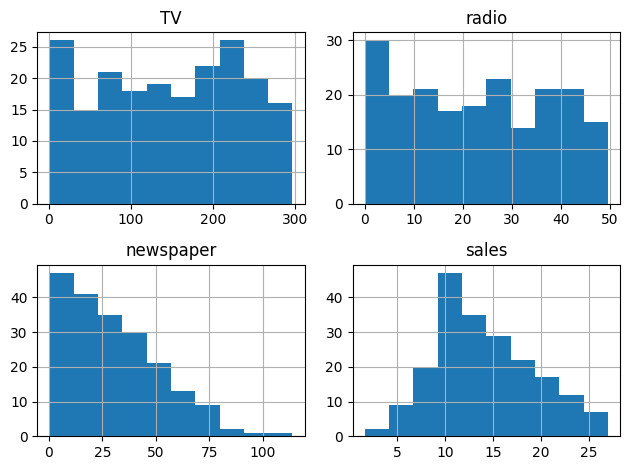

In [3]:
# using pandas and matplotlib
import matplotlib.pyplot as plt

df.hist()
plt.tight_layout()

### Train Test Split

In [4]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales'], axis=1),
                                                    df['sales'],
                                                    test_size=0.20,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


### The Model

In [5]:
# build, train (fit), predict, evaluate the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train.values, y_train)
predictions = model.predict(X_test.values)
print(f'R-Squared: {r2_score(y_test, predictions)}')

R-Squared: 0.899438024100912


### Ordinary Least Squares

In [6]:
# add constant and build model
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           2.53e-76
Time:                        18:30:16   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.000       2.281       3.677
TV             0.0447      0.002     28.544      0.000       0.042       0.048
radio          0.1892      0.010     19.518      0.000       0.170       0.208
newspaper      0.0028      0.007      0.392      0.696      -0.011       0.017
==============================================================================
Omnibus:                       67.697   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.326
Skew:                          -1.627   Prob(JB):                     6.52e-53
Kurtosis:                       8.046   Cond. No.                         471.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# view the coefficients and intercept
print(model.params)

const        2.979067
TV           0.044730
radio        0.189195
newspaper    0.002761
dtype: float64


### Confidence Intervals

(-100.0, 400.0)

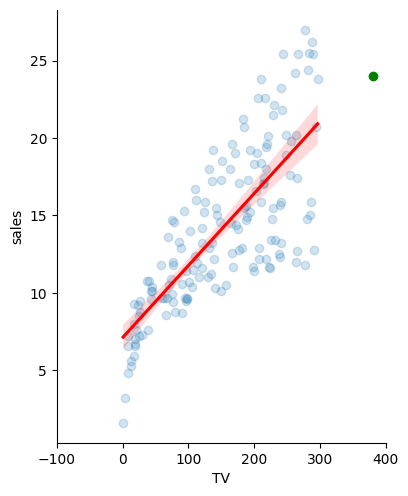

In [8]:
# scatterplot example with seaborn (sns)
import seaborn as sns

sns.pairplot(data=pd.concat([X_train, y_train], axis=1),
             x_vars=X_train[['TV']].columns,
             y_vars='sales',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}});

plt.plot(380, 24, 'go')
plt.xlim(-100, 400)

### Prediction Intervals

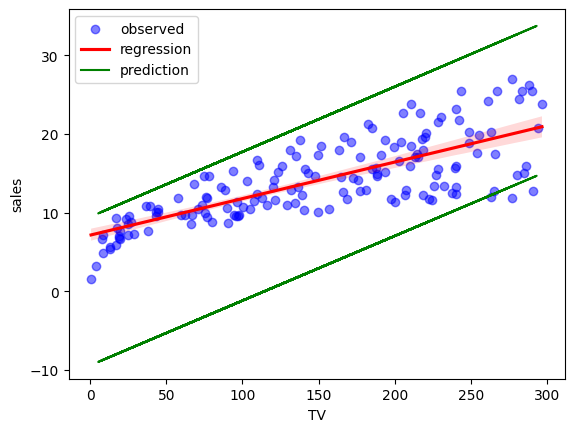

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

intervals_model = sm.OLS(y_train, X_train['TV']).fit()
predictions = intervals_model.get_prediction(X_test['TV']).summary_frame()

sns.regplot(data=pd.concat([X_train, y_train], axis=1),
            x='TV',
            y='sales',
            scatter_kws={'color': 'blue', 'alpha': 0.5},
            label='observed',
            line_kws={'label': 'regression'},
            color='red')

plt.plot(X_test['TV'], predictions['obs_ci_upper'], label='prediction', color='green')
plt.plot(X_test['TV'], predictions['obs_ci_lower'], color='green')
plt.legend();

In [10]:
# make a prediction
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales'], axis=1),
                                                    df['sales'],
                                                    test_size=0.20,
                                                    random_state=42)


model = LinearRegression()
model.fit(X_train.values, y_train)

tv = 232.1
radio = 8.6
newspaper = 8.7
model.predict(np.array([tv, radio, newspaper]).reshape(1, -1))

array([15.0118875])

In [11]:
# what are our coefficients?
print('intercept', model.intercept_)
list(zip(X_train, model.coef_))

intercept 2.979067338122629


[('TV', 0.044729517468716326),
 ('radio', 0.18919505423437652),
 ('newspaper', 0.0027611143413671935)]

### Practical Application

y = intercept + coef_0(TV) + coef_1(radio) + coef_2(newspaper)

**Interpreting a coefficient**: \$1000 dollars on radio advertising would be associated with an increase of sales by 0.19 * 1000, or 190 units, given spending stays the same.

If we want to see an increase of 20 units in sales, given a unit is one million dollars, and we are spending \\$37,800 on radio advertising, how much would we need to spend on TV advertising? Note: our sales has been scaled to match units of TV and radio spending, given TV and radio units are $1000 each.

Consider this equation:

$
y = \beta_0 + \beta_1(X_1) + \beta_2(X_2)
$

To see an increase of 20 units in sales knowing that we are spending \\$37,800 on radio advertising, what do we need to spend on TV?

In [13]:
# Solve for X1
X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
# model.summary()
intercept = model.params['const']
B1 = model.params['TV']
B2 = model.params['radio']
X2 = 37.8
print(f'20 = {intercept:0.2f} +( {B1:0.2f} * X1) + ({B2:0.2f} * {X2})')

20 = 2.98 +( 0.04 * X1) + (0.19 * 37.8)


### Matrix Multiplication

* $y_i = \theta^TX_i + \epsilon_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1$
* $\theta = (X^T * X)^{-1} * X^T * y$
* Dot product - https://en.wikipedia.org/wiki/Dot_product
* Inverse - https://www.mathsisfun.com/algebra/matrix-inverse.html
* To multiply an m×n matrix by an n×p matrix, the ns must be the same,
and the result is an m×p matrix.

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X = X_train
y = y_train

model = sm.OLS(y, X).fit()
print('StatsModel')
print(model.params)
print()
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
np.matmul(np.linalg.inv(np.matmul(X.values.T, X.values)), np.matmul(X.values.T, y))

StatsModel
const        2.979067
TV           0.044730
radio        0.189195
newspaper    0.002761
dtype: float64

Numpy Linear Algebra
weights =  [2.97906734e+00 4.47295175e-02 1.89195054e-01 2.76111434e-03]


array([2.97906734e+00, 4.47295175e-02, 1.89195054e-01, 2.76111434e-03])

## Logistic Regression




x, y scatter plot with line of best fit as per our line equation
y = -0.01854199043372308 + 0.9843792152472937X


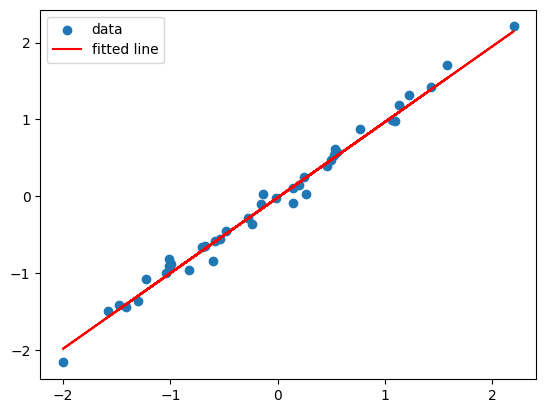

In [16]:
# create and train the model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=50, n_features=1, noise=10)
df = pd.DataFrame(data=X, columns=['x'])
df['y'] = y

scaler = StandardScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])


# decision threshold = .5
df['class'] = df['y'].apply(lambda x: 0 if x <= 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
predictions = model.predict(X_test)
print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
# plt.axhline(0.5, color='green', linestyle='dashed', label='threshold')
plt.legend();

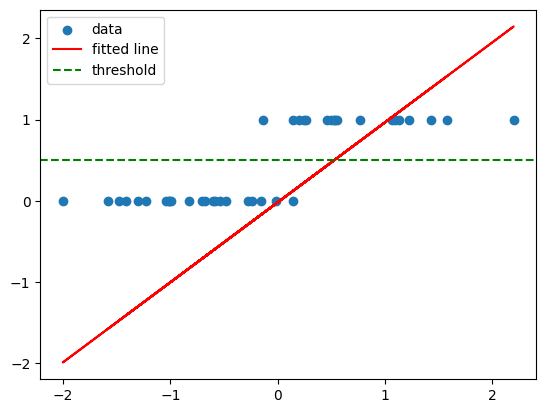

In [18]:
# does a line of best fit over a binary dependent variable make sense?
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
# plt.axvline(0, color='gray', label='y=0')
plt.legend();

### The Sigmoid

Sigmoid curves are common in statistics as cumulative distribution functions (which go from 0 to 1), such as the integrals of the logistic density, the normal density, and Student's t probability density functions. The logistic sigmoid function is invertible, and its inverse is the logit function.

https://en.wikipedia.org/wiki/Sigmoid_function

Sigmoidal growth is a modification of exponential growth in which the percent change gets smaller as the population approaches the carrying capacity.

http://matcmath.org/textbooks/quantitativereasoning/sigmoidal-growth/


An S curve that is bound by 1 and 0


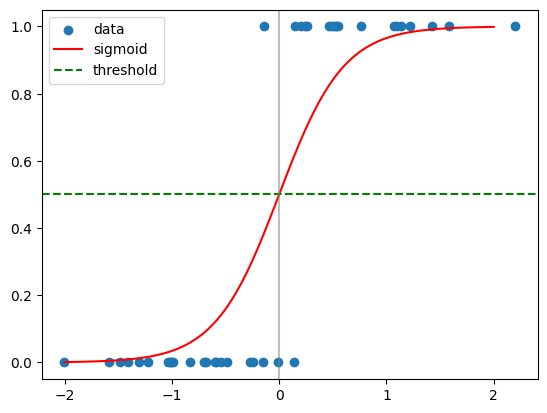

In [19]:
# what we'd really like
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-2, 2, 100)
s = .3 # scale parameter
print('\nAn S curve that is bound by 1 and 0')
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), color='red', label='sigmoid')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.axvline(0, color='gray', alpha=0.5)
plt.legend()
plt.show()

### Odds

$\large{\frac{p}{1 - p}} = \beta_0 + \beta_1 X$

Odds are positive so we have a range of 0, $+ \infty$ so we use log

### Log Odds

We use the log of odds so that we can get to $(-\infty, +\infty)$

$\large{log(\frac{p}{1 - p}}) = \beta_0 + \beta_1 X$

Now our range is unrestricted $- \infty, + \infty$ where the odds for and odds against meet at 0 with potential symmetrical range 0 to infinity.

### Logistic Model

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination).

* $p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}}$

In [20]:
# Create dataset
import pandas as pd
from sklearn.datasets import make_classification

n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features

# unpack X and y
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=42)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Class'] = binary_class
df.head()

,Feature_1,Feature_2,Class
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


In [21]:
# get our parameters
from statsmodels.formula.api import logit

model = logit(formula='Class ~ Feature_1 + Feature_2', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.242088
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Jun 2024   Pseudo R-squ.:                  0.6507
Time:                        18:43:05   Log-Likelihood:                -242.09
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.283e-196
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1197      0.365      3.070      0.002       0.405       1.834
Feature_1     -0.4561      0.171     -2.673      0.008      -0.790      -0.122
Feature_2      3.4780      0.237     14.649      0.000       3.013       3.943
==============================================================================
"""

In [23]:
import numpy as np
import math

print(model.params)
def logistic_function(row):
    b0 = model.params.Intercept
    b1 = model.params.Feature_1
    b2 = model.params.Feature_2

    x1 = row['Feature_1']
    x2 = row['Feature_2']

    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

df['p'] = df.apply(logistic_function, axis=1)
df['Predicted'] =  df['p'].apply(lambda x: 0 if x < .5 else 1)
df['Odds'] = df['p']/(1 - df['p'])
df['Log Odds'] = df['Odds'].apply(lambda x: math.log(x))
df.head()

Intercept    1.119669
Feature_1   -0.456101
Feature_2    3.478029
dtype: float64


,Feature_1,Feature_2,Class,p,Predicted,Odds,Log Odds
0,0.601034,1.535353,1,0.997945,1,485.673902,6.185537
1,0.755945,-1.172352,0,0.035482,0,0.036788,-3.302593
2,1.354479,-0.948528,0,0.057480,0,0.060985,-2.797120
3,3.103090,0.233485,0,0.626309,1,1.676007,0.516414
4,0.753178,0.787514,1,0.971116,1,33.620678,3.515141


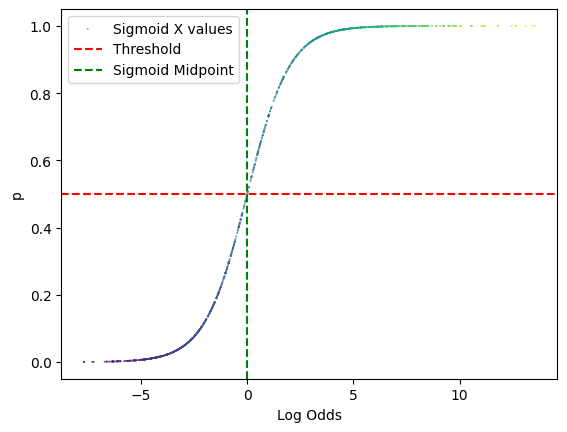

In [24]:
import matplotlib.pyplot as plt

df.plot.scatter(x='Log Odds', y='p', marker='.', s=.5, label='Sigmoid X values', c=df['Log Odds'])
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.axvline(x=0, color='green', linestyle='dashed', label='Sigmoid Midpoint')
plt.legend()
plt.show()

## Trees

Decision trees are able to handle missing values and outliers in the data much better then a logistic regression. A decision tree is not affected by outliers because it splits the data based on the feature values.

## Pipelines

In [25]:
!git clone https://github.com/gitmystuff/preppy.git

Cloning into 'preppy'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (41/41), done.
Receiving objects: 100% (52/52), 21.79 KiB | 7.26 MiB/s, done.
Resolving deltas: 100% (23/23), done.
remote: Total 52 (delta 23), reused 19 (delta 8), pack-reused 0


In [32]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import preppy.utils as utils

class DoPreppy(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, X, y):
    return self

  def transform(self, X):

    if isinstance(X, np.ndarray):  # Check if X is a NumPy array
        X = pd.DataFrame(X)

    consts = utils.functions.identify_consts(X)
    X.drop(consts, axis=1, inplace=True)
    quasi_consts = utils.functions.identify_quasi_consts(X)
    X.drop(quasi_consts, axis=1, inplace=True)
    duplicate_features = utils.functions.check_col_duplicates(X)
    X.drop(duplicate_features, axis=1, inplace=True)
    X = utils.functions.handle_missing_values(X)
    return X.values

url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/Advertising.csv'
df = pd.read_csv(url, usecols=['TV', 'radio', 'newspaper', 'sales'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales'], axis=1),
                                                    df['sales'],
                                                    test_size=0.20,
                                                    random_state=42)


pipe = [
    ('preppy', DoPreppy()),
    ('scalar', StandardScaler()),
    ('model', Lasso(alpha=1, fit_intercept=True))
]

pipe_model = Pipeline(pipe)
pipe_model.fit(X_train, y_train)

d = {'Feature': X_train.columns, 'Coef': pipe_model['model'].coef_}
pipe_df = pd.DataFrame(d)
print(pipe_df)
print()
print(f'Training Score: {pipe_model.score(X_train.values, y_train.values)}')
print(f'Test Score: {pipe_model.score(X_test, y_test)}')

     Feature      Coef
0         TV  2.815212
1      radio  1.865153
2  newspaper  0.000000

Training Score: 0.8224279248210367
Test Score: 0.8179966490329236
